# PROJECT : DETERMINING CONFUSION LEVELS AFTER AN EEG TEST 

##### Project Overview:
The purpose of this project is to determine levels of Confusion from a Electroencephalogram(EEG) Test.

To dertermine whether the subject is expected to be confused or is actually confused 

#### Step :
In this Step We will first Import the Dataset and the necessary modules. Run the code block below to load the Dataset.

In [5]:
# Import the neccessary libraries 
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# matplotlib plots inline 
%matplotlib inline

#Importing and Reading into the datset
data = "EEG data.csv"
load_EEG_data = pd.read_csv(data)
EEG_data = load_EEG_data.astype(np.float)
#print(EEG_data)

#print(EEG_data)
print ("Data loaded succesfully!")
print ("EEG dataset has {} samples with {} features each.".format(*EEG_data.shape))

Data loaded succesfully!
EEG dataset has 12811 samples with 15 features each.


We can then go further and find the following basic stastical facts about the data by Describing the data. Run the Code block below to describe the data

In [6]:
# Print the first ten rows of the dataset
EEG_data.head()

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [7]:
display(EEG_data.describe())

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label
count,12811.000000,12811.000000,12811.000000,12811.000000,12811.000000,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,1.281100e+04,12811.000000,12811.000000
mean,4.487394,4.390602,41.313871,47.182656,65.570760,6.057853e+05,1.680526e+05,4.138435e+04,3.318339e+04,2.431837e+04,3.814433e+04,2.959255e+04,1.441597e+04,0.470377,0.512606
std,2.865373,2.913232,23.152953,22.655976,597.921035,6.376236e+05,2.441346e+05,7.243082e+04,5.831410e+04,3.837968e+04,7.906606e+04,7.982637e+04,3.603523e+04,0.499141,0.499861
min,0.000000,0.000000,0.000000,0.000000,-2048.000000,4.480000e+02,1.700000e+01,2.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.000000e+00,2.000000e+00,0.000000,0.000000
25%,2.000000,2.000000,27.000000,37.000000,-14.000000,9.806400e+04,2.691750e+04,6.838000e+03,6.852000e+03,6.140000e+03,7.358500e+03,4.058000e+03,2.167500e+03,0.000000,0.000000
50%,4.000000,4.000000,43.000000,51.000000,35.000000,3.954870e+05,8.133100e+04,1.750000e+04,1.495900e+04,1.281800e+04,1.581000e+04,9.763000e+03,5.116000e+03,0.000000,1.000000
75%,7.000000,7.000000,57.000000,63.000000,90.000000,9.166230e+05,2.052760e+05,4.477950e+04,3.455050e+04,2.740600e+04,3.549400e+04,2.488800e+04,1.266950e+04,1.000000,1.000000
max,9.000000,9.000000,100.000000,100.000000,2047.000000,3.964663e+06,3.007802e+06,1.369955e+06,1.016913e+06,1.067778e+06,1.645369e+06,1.972506e+06,1.348117e+06,1.000000,1.000000


###### Identifying missing values in the dataset:

This step is done to see if there is any missing data present in the dataset. Identifying missing data is key because having missing data values in some or most instances can alter or skew datasets and make provide a lesser accuracy on the data. 

In [8]:
EEG_missing_data = EEG_data.isnull().sum()
print EEG_missing_data

subject ID            0
Video ID              0
Attention             0
Meditation            0
Raw                   0
Delta                 0
Theta                 0
Alpha 1               0
Alpha 2               0
Beta 1                0
Beta 2                0
Gamma1                0
Gamma2                0
predefined label      0
Self-defined label    0
dtype: int64


From the above we can see that the EEG dataset has no missing values

 #### In this step we can analyze the data by plotting a few graphs to see the physical shape of the data


###### Graph A: Vizualizing Feature Distributions

This graph shows us how scattered the data really is for each feature 

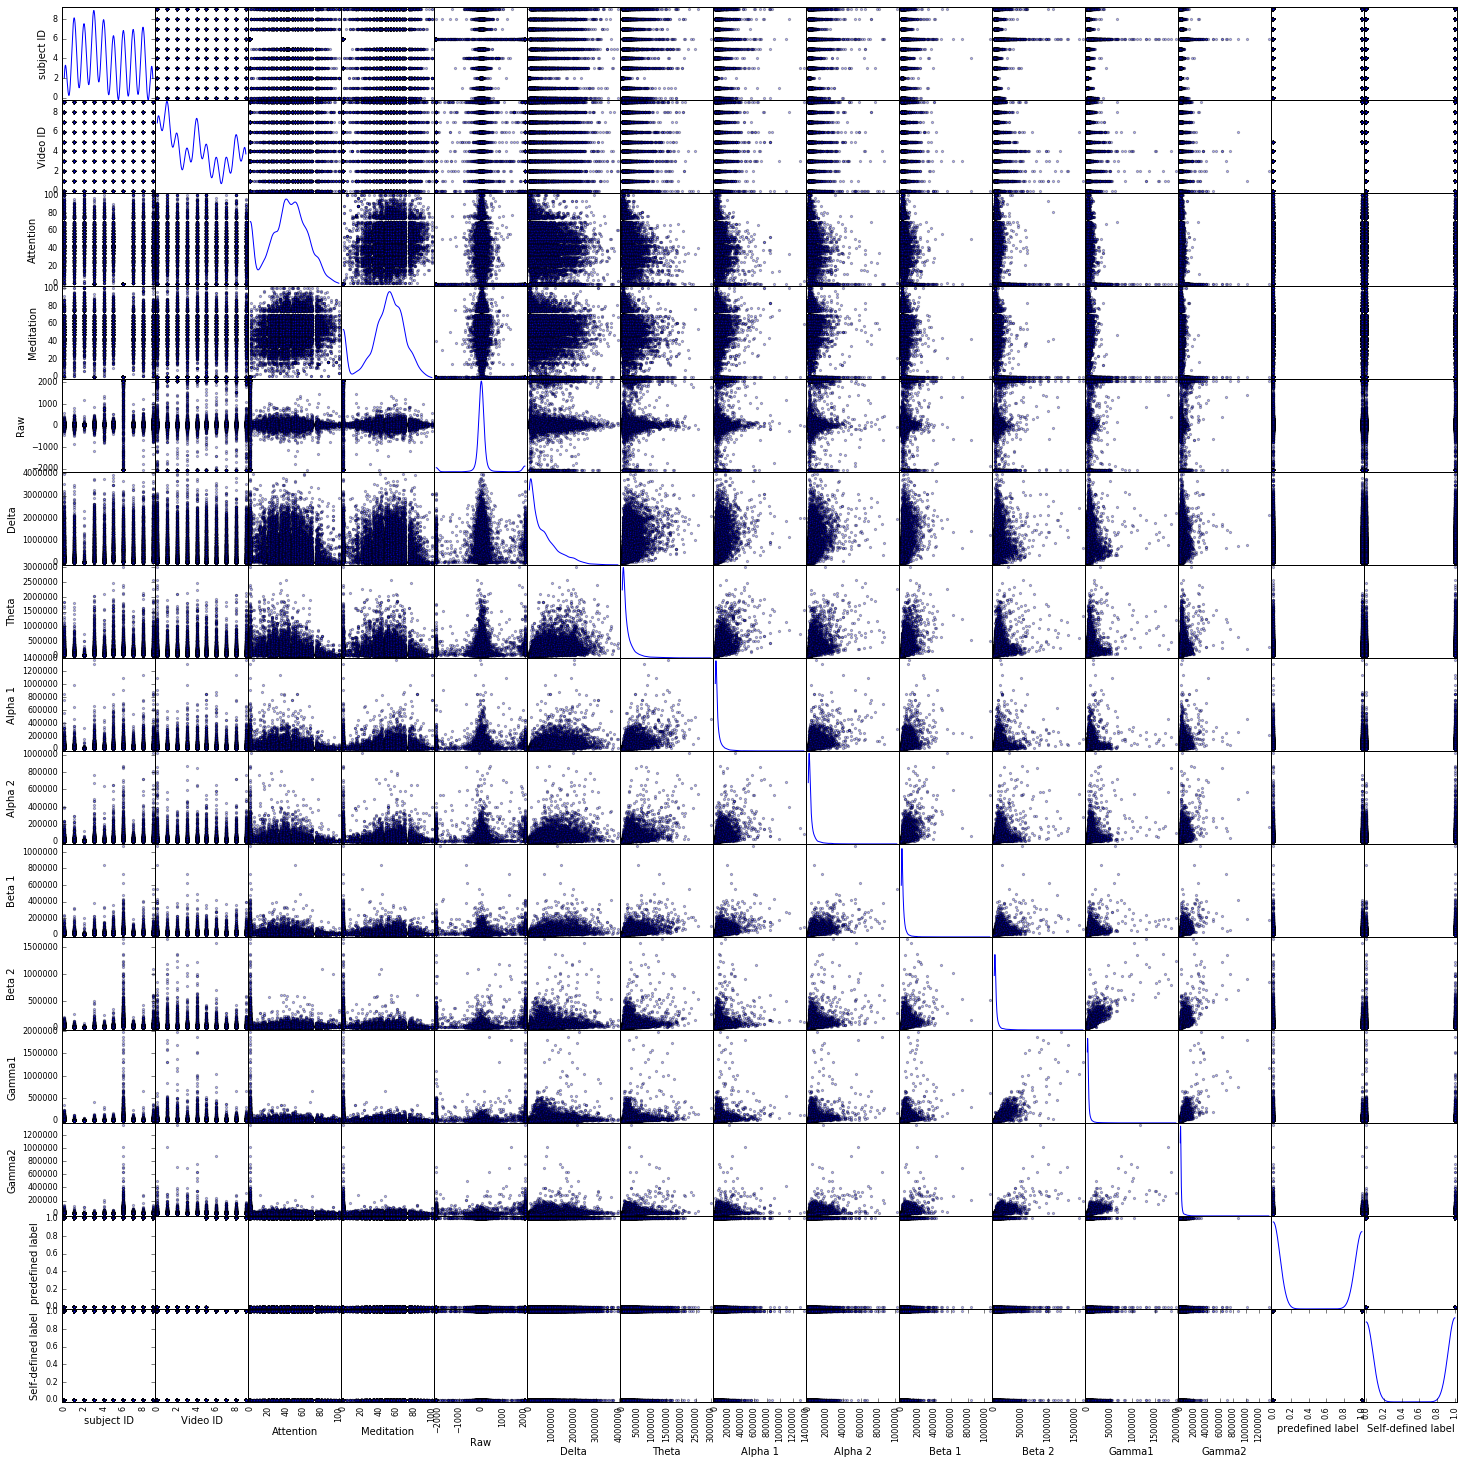

In [7]:
pd.scatter_matrix(EEG_data, alpha = 0.3, figsize = (25,25), diagonal = 'kde');

From the graph above. We can see that the data is scattered in some instances and very skewed in others. However our mian focus should to observe the graphs of the "pre-defined label and "Self Defined label" which are the states being whether the subject is expected to be confused or whether the subject is actually confused. 
The main graphs to observe are the graphs which relate to the Raw EEG exposure till Gamma2. Reason being these yield the amount of EEG exposure by power spectrum. This tells/shows us how much power was used in order to achieve expected state of confusion or an actual state of confusion.

However from the graph above it is very difficult to make judgement to say whether the test subjects yielded an expected or actual state of confusion because of the vast scattering and vast skewness in the data. 

## Data Preprocessing 

### Feature Scaling of Data 

From the above step we tried to analyze the spectrums of power and what results they yielded in relation to the subject expecting to be confused or actually being confused. However the data was too skewed or very scattered. 
In this step we will use Normalization to scale the data


In [9]:
from sklearn import preprocessing
import numpy as np

scaled_data = preprocessing.scale(EEG_data, axis=0, with_mean=True, with_std=True, copy=True)
print scaled_data

[[-1.56613795 -1.50718299  0.63433386 ..., -0.16992292 -0.94240946
  -1.02553872]
 [-1.56613795 -1.50718299 -0.05674966 ..., -0.32402812 -0.94240946
  -1.02553872]
 [-1.56613795 -1.50718299  0.24559938 ...,  0.30354887 -0.94240946
  -1.02553872]
 ..., 
 [ 1.5749374   1.58229026  0.80710475 ..., -0.34389834  1.06110989
  -1.02553872]
 [ 1.5749374   1.58229026  0.80710475 ..., -0.35111378  1.06110989
  -1.02553872]
 [ 1.5749374   1.58229026  0.97987563 ..., -0.27568466  1.06110989
  -1.02553872]]


C:\Users\Deepak Mahtani\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


We have now scaled the dataset. However, when we print out scaled_data we get an array. We would like to continue working with the data in a dataframe format. Below we will convert the array back into a dataframe format. We will be using the same column names the only difference is that the numerical values will be scaled

In [10]:
import pandas as pd

column_names = EEG_data.columns # Re name the columns just like the original dataset. We then pass it in the 

EEG_scaled_data = pd.DataFrame(scaled_data, index=None, columns = column_names, dtype=None, copy=False)
column_names = EEG_data.columns # Re name the columns just like the original dataset. We then pass it in the 


display(EEG_scaled_data.head())

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label
0,-1.566138,-1.507183,0.634334,-0.184623,0.355294,-0.476510,-0.317217,-0.105613,-0.157642,0.094523,0.087938,0.045544,-0.169923,-0.942409,-1.025539
1,-1.566138,-1.507183,-0.056750,-0.537745,-0.193295,-0.834378,-0.573352,-0.551518,-0.530654,-0.562100,-0.435821,-0.304417,-0.324028,-0.942409,-1.025539
2,-1.566138,-1.507183,0.245599,0.036078,0.059256,0.239285,0.883532,2.217577,0.496016,0.312017,1.168583,0.346396,0.303549,-0.942409,-1.025539
3,-1.566138,-1.507183,0.245599,0.433339,-0.118031,2.205862,-0.158536,0.274088,-0.276091,-0.334314,0.307573,0.255157,0.541603,-0.942409,-1.025539
4,-1.566138,-1.507183,0.116021,0.256779,-0.123049,0.626350,0.763033,-0.059126,0.955168,0.546890,0.777338,0.190389,0.425518,-0.942409,-1.025539


From the above table, we can see that we have our newly modifed EEG dataset with the same column headings but the main difference is that all the numerical rows of data have all been succesfully scaled down. 
However, we have a slight issue with the columns "subject ID" and "Video ID". They are unique keys or primary keys and should not have been normalized. We can simply Replace the columns from the original dataset. 
Also I bet if i didnt tell you . you wouldnt have noticed that our data for Expected COnfusion is Ones and Zeros . We need to keep it that way. 



In [11]:
EEG_scaled_data["subject ID"] = EEG_data["subject ID"]
EEG_scaled_data["Video ID"] = EEG_data["Video ID"]
EEG_scaled_data["predefined label"] = EEG_data["predefined label"]
EEG_scaled_data["Self-defined label"] = EEG_data["Self-defined label"]

display(EEG_scaled_data.head())

,subject ID,Video ID,Attention,Meditation,Raw,Delta,Theta,Alpha 1,Alpha 2,Beta 1,Beta 2,Gamma1,Gamma2,predefined label,Self-defined label
0,0.0,0.0,0.634334,-0.184623,0.355294,-0.476510,-0.317217,-0.105613,-0.157642,0.094523,0.087938,0.045544,-0.169923,0.0,0.0
1,0.0,0.0,-0.056750,-0.537745,-0.193295,-0.834378,-0.573352,-0.551518,-0.530654,-0.562100,-0.435821,-0.304417,-0.324028,0.0,0.0
2,0.0,0.0,0.245599,0.036078,0.059256,0.239285,0.883532,2.217577,0.496016,0.312017,1.168583,0.346396,0.303549,0.0,0.0
3,0.0,0.0,0.245599,0.433339,-0.118031,2.205862,-0.158536,0.274088,-0.276091,-0.334314,0.307573,0.255157,0.541603,0.0,0.0
4,0.0,0.0,0.116021,0.256779,-0.123049,0.626350,0.763033,-0.059126,0.955168,0.546890,0.777338,0.190389,0.425518,0.0,0.0


 This is the final form of our scaled data. 

### Preparing the data for Training and Testing 

#### Step : 

After we have read and explored into the data one can now further analyze the data and what type of approach we can use to disect the dataset further. From analyzing we can see that the features are already given to this which makes this a Supervised Learning Case. Now that we know what type of dataset it is we can go ahead and approach it as Supervised Learning case.


In this Step the data will be prepared for modelling training and testing. We will do this by identifying features and targets. 

#### (Note: The last two columns which determine the confusions state levels are the target columns that we are attempting to predict)

In [12]:
# Extract feature (X) and target (y) columns
import numpy as np

features_columns = list(EEG_scaled_data.ix[:,:"Gamma2"])

target_column_one = (EEG_scaled_data.columns[-2]) # Extracting the Expected confusion column

target_column_two = (EEG_scaled_data.columns[-1]) # Exctracting the Actual confusion column

X_data = EEG_scaled_data[features_columns]

y_data_ec = EEG_scaled_data[target_column_one] # the testing data for Expected Confusion (ec)

y_data_ac = EEG_scaled_data[target_column_two] # the testing data for Actual Confusion (ac)


print ("Feature column(s):-\n{}".format(features_columns))
print ("Target column One : {}".format(target_column_one))
print ("Target column Two : {}".format(target_column_two))

Feature column(s):-
['subject ID', 'Video ID', 'Attention', 'Meditation', 'Raw', 'Delta', 'Theta', 'Alpha 1', 'Alpha 2', 'Beta 1', 'Beta 2', 'Gamma1', 'Gamma2']
Target column One : predefined label
Target column Two : Self-defined label


In the step above we distinguished between the features and targets and then we assigned them to variables respectively. We have two target columns because we are going to train test and split the data on Expected Confusion and Actual Confusion separately. 

## Training ,Testing and Splitting the Data

#### Step :

In this Step We are going to run two train test split algorithms one trains and tests with the Expected Confusion . The other trains and tests with the Actual Confusion. 

We are going to Split the data into training and testing sets.(We can learn this by looking at the sklearn documenation). We are going to split the training and testing set by 80% and 20% respectively.

In [13]:
# Import the neccessary libraries
import numpy as np
from sklearn import cross_validation

def train_test_split_data(X, y):
#Shuffles and splits data into 80% training and 20% testing subsets,then returns the training and testing subsets.

    # Training, Testing and Splitting with Expected Confusion(ec)
    X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.20, random_state=42)
    
    # Converting y test and y train
    y_train = np.asarray(y_train, dtype="|S6")
    y_test = np.asarray(y_test, dtype="|S6")
    
    # Return the training and testing data subsets
    return X_train, y_train, X_test, y_test

# Testing train_test_split_data 
try:
    X_train_ec, y_train_ec, X_test_ec, y_test_ec = train_test_split_data(X_data, y_data_ec)
    X_train_ac, y_train_ac, X_test_ac, y_test_ac = train_test_split_data(X_data, y_data_ac)
    
    print ("Successfully Trained, Tested and Split the data!")
except:
    print ("Something went wrong with Training, Testing and Splitting the data.")
    
#Additional print statements here:    
print ("Expected Confusion Training set: {} samples".format(X_train_ec.shape[0]))
print ("Expected Confusion Testing set: {} samples".format(X_test_ec.shape[0]))
print ("Actual Confusion Training set: {} samples".format(X_train_ac.shape[0]))
print ("Actual Confusion Testing set: {} samples".format(X_test_ac.shape[0]))

Successfully Trained, Tested and Split the data!
Expected Confusion Training set: 10248 samples
Expected Confusion Testing set: 2563 samples
Actual Confusion Training set: 10248 samples
Actual Confusion Testing set: 2563 samples


Because when we normalized earlier we got an array. We then converted the data to a dataframe. If we dont convert the y values we will get an error, WHy? Remember we can train on an array with many features which if we shape will give us a 2 dimensional array. But we cannot test on on more than one target columns because testing data arrays need to be one dimensional. So therefore we had to convert the y data values back to an array format in order for it too work.

### Feature Selection 

From above: We determined the Training and testing scores for Actual Confusion and Expected Confusion. This tells us that the Expected Confusion rate was much higher than the Actual Confusion Rate. However, although we have determined the scores for Expected and Actual Confusion, and we have knowledged that the participants were expected to be confused rather than actually being confused,but this does not tell us enough information on how they confusion levels were determined. Therefore in this section we will apply Feature Selection to narrow down the factors that affect the levels of Confusion.   

###### In this section we will pre process our data for Predictingmodel(s). 

We doing this by selecting the important features which will then be used in the Prediction model to compare our Features to our target sets which are "predefined labels" (Expected COnfusion) and "Self-defined labels" (Actual Confusion)

###### We will use the sci -kit learn alogirthm known as SelectKBest. What this does will extract our most suitable features for predictions.

###### We will Run the SelectKBest algorithm twice.



First, We will extract the most suitable or relevant features for Expected Confusion:

[  5.32886698e-01   0.00000000e+00   8.12717425e-01   1.03654452e-01
   1.50887162e-01   7.38827309e-01   9.94090988e-01   8.42769155e-02
   6.55020078e-01   2.15610081e-01   4.37585744e-20   5.80498093e-10
   1.11860363e-02]


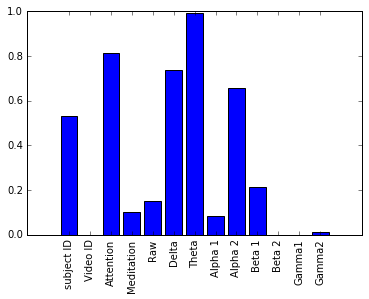

In [14]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector_ec = SelectKBest(f_classif, k=13)
selector_ec.fit(X_train_ec, y_train_ec)

scores_ec = selector_ec.pvalues_
print scores_ec

# We created a variable features_columns earlier in the pre processing phase we simply re call that variable and pass it here


# Plotting the bar Graph to visually see the weight of each feature
plt.bar(range(len(scores_ec)), scores_ec, align='center')
plt.xticks(range(len(features_columns)), features_columns, rotation='vertical')
plt.show()

Secondly, We will Extract the most suitable features for Actual Confusion:

From the above we implented the SelectKBest algorithm from Sklearn to extract the possible best features which will be used in our prediction models later. Now for this problem we are going to implement a function which takes out the relevant features above the score 0.2



[  2.26690148e-01   7.61714170e-01   3.96617647e-34   1.60042548e-02
   7.18269900e-01   3.12216670e-47   2.10778709e-55   1.64121446e-32
   1.20361125e-28   8.56828219e-28   1.91947450e-02   5.46116668e-02
   3.88124211e-09]


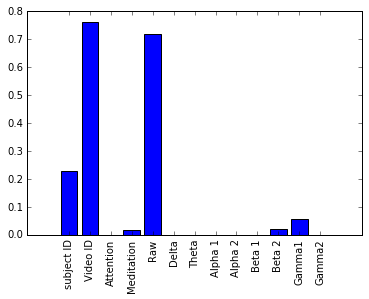

In [15]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

selector_ac = SelectKBest(f_classif, k=13)
selector_ac.fit(X_train_ac, y_train_ac)

scores_ac = selector_ac.pvalues_
print scores_ac


# Plotting the bar Graph to visually see the weight of each feature
plt.bar(range(len(scores_ac)), scores_ac, align='center')
plt.xticks(range(len(features_columns)), features_columns, rotation='vertical')
plt.show()

###### Exctracting the Relevant Selected Features 

In this section we will use the data from the graph above to extract our selected features. How will we go about this?
We will will have to separate the selected features and put them in a data structure as a list or dictionary. 
We can go about doing this in two ways manually selecting the features and storing them in a data structure. OR we can build code that selects the scores automatically from us over a certain level. 

In this step we are extracting the relevant features to work with the Expected Confusion Model(s)

In [16]:
# Getting the relevant features for the Expected Confusion Model 
n_features_ec =[]
dict_2 = {}
dict_features_ec ={}

for score in scores_ec:
    if score >= 0.5:
        n_features_ec.append(score)

#print n_features_ec

for feature,n in zip(features_columns, scores_ec):
    dict_2[feature] = n
#print dict_features_ec
#print dict_features_ec

#loop over the dictionary

for key, value in dict_2.items():
    for item in n_features_ec:
        if item == value:
            dict_features_ec[key] = item

print dict_features_ec

{'Theta': 0.99409098798870876, 'Alpha 2': 0.65502007804005136, 'Attention': 0.81271742459597673, 'subject ID': 0.53288669848239767, 'Delta': 0.73882730936738183}


In this step we are extracting the relevant features to work with the Actual Confusion Model(s)

In [17]:
# Getting the relevant features for the ActualConfusion Model 
n_features_ac =[]
dict_1 = {}
dict_features_ac ={}

for score in scores_ac:
    if score >= 0.5:
        n_features_ac.append(score)

#print n_features_ec

for feature,n in zip(features_columns, scores_ac):
    dict_1[feature] = n
#print dict_features_ec
#print dict_features_ec

#loop over the dictionary

for key, value in dict_1.items():
    for item in n_features_ac:
        if item == value:
            dict_features_ac[key] = item

print dict_features_ac

{'Raw': 0.71826989961435617, 'Video ID': 0.76171417034644007}


## Training the Prediction Model(s)

In this Section , This is where we will actually run some predictions on our testing set. We will use our selected features in our prediction models to determine Actual Confusion or Expected Confusion.

First, we need to list the feature keys that we extracted from our dictionaries.

In [18]:
# Re assign the X_train and Test values with our selected features 
X_train_ec = X_train_ec[["Theta", "Alpha 2", "Attention", "subject ID", "Delta"]]
#print X_train_ec.shape

X_test_ec = X_test_ec[["Theta", "Alpha 2", "Attention", "subject ID", "Delta"]]
#print X_test_ec.shape


In [19]:
X_train_ac = X_train_ac[["Raw", "Video ID"]]
#print X_train_ac.shape
X_test_ac = X_test_ac[["Raw", "Video ID"]]
#print X_test_ac.shape

We will be using 5 types of prediction Models that all can be found on Sklearn.
1. Deciscion Tree Regressor 
2. SVM(Support Vector Machine 
3. GNB (Gaussian Naive Bayes)
4. KNN(Ks Nearest Neighbour Classifier)
5. Random Forest Classifier 


We will run each prediction on Actual Confusion and Expected Confusion respectively. 

Below is a function in which we will pass our models through since we will be using muliple models, the implementation of all the models are very similar so we can just re call the function everytime we wish to implement a Model


In [20]:
import time

def implement_the_classifier(clf, X_train, y_train):
    print ("Implementing the {} ...".format(clf.__class__.__name__)) #
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print ("\nTraining time (secs): {:.3f}".format(end - start))
    return clf

# Check to see if the train_classifier function is operating
try:
    print "A Prediction Model is ready to be implemented!"
except:
    print "A Prediction Model is not ready to be implemented!"

A Prediction Model is ready to be implemented!


A function to predict F1 Scores for Expected Confusion 

In [21]:
# Predicting  on a training set and calculating the F1 score
from sklearn.metrics import f1_score

def predict_scores_ec(clf, features, target):
    print ("Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred_train_ec = clf.predict(features)
    end = time.time()
    score = f1_score(target, y_pred_train_ec, pos_label=None, average="weighted")
    return score
    print ("\nPrediction time (secs): {:.3f}".format(end - start))
     

A Function to predict F1 Scores for Actual COnfusion 

In [22]:
from sklearn.metrics import f1_score

def predict_scores_ac(clf, features, target):
    print ("Predicting labels using {}...".format(clf.__class__.__name__))
    start = time.time()
    y_pred_train_ac = clf.predict(features)
    end = time.time()
    score = f1_score(target, y_pred_train_ac, pos_label=None, average="weighted")
    return score
    print ("\nPrediction time (secs): {:.3f}".format(end - start))

### Implementation of  the Decision Tree Classifier Model

   ###### Predicting Expected Confusion 

In [23]:
#implement the model 
from sklearn import tree # Choose model in this case Decision tree Classifier
clf_decision_tree = tree.DecisionTreeClassifier() 

# Fit the model to the training data
clf_decision_tree = implement_the_classifier(clf_decision_tree, X_train_ec, y_train_ec)#The train_classifier function is being called

Implementing the DecisionTreeClassifier ...

Training time (secs): 0.107


In [24]:
train_f1_score_dt_ec = predict_scores_ec(clf_decision_tree, X_train_ec, y_train_ec)
print ("F1 score for the Expected Confusion Training Set: {}".format(train_f1_score_dt_ec))
print ("F1 score for the Expected Confusion Testing Set: {}".format(predict_scores_ec(clf_decision_tree, X_test_ec, y_test_ec)))

Predicting labels using DecisionTreeClassifier...
F1 score for the Expected Confusion Training Set: 1.0
Predicting labels using DecisionTreeClassifier...
F1 score for the Expected Confusion Testing Set: 0.543291178363


###### Predicting Actual Confusion 

In [25]:
#Since we already fit the Decision Tree Classifier above we can simply call the function and change the parameters
clf_decision_tree = implement_the_classifier(clf_decision_tree, X_train_ac, y_train_ac)

Implementing the DecisionTreeClassifier ...

Training time (secs): 0.027


In [26]:

train_f1_score_dt_ac = predict_scores_ac(clf_decision_tree, X_train_ac, y_train_ac)
print ("F1 score for the Actual Confusion Training Set: {}".format(train_f1_score_dt_ac))
print ("F1 score for the Actual Confusion Testing Set: {}".format(predict_scores_ac(clf_decision_tree, X_test_ac, y_test_ac)))

Predicting labels using DecisionTreeClassifier...
F1 score for the Actual Confusion Training Set: 0.811198300492
Predicting labels using DecisionTreeClassifier...
F1 score for the Actual Confusion Testing Set: 0.642594528681


### Implementation of  the Support Vector Machine (SVM) Model

###### Predicting Expected Confusion 

In [27]:
from sklearn import svm

clf_svm = svm.SVC()
implement_the_classifier(clf_svm, X_train_ec, y_train_ec)

Implementing the SVC ...

Training time (secs): 7.077


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
train_f1_score_svm_ec = predict_scores_ec(clf_svm, X_train_ec, y_train_ec)
print ("F1 score for SVM for the Expected Confusion Training Set: {}".format(train_f1_score_svm_ec))
print ("F1 score for SVM for the Expected Confusion Testing Set: {}".format(predict_scores_ec(clf_svm, X_test_ec, y_test_ec)))

Predicting labels using SVC...
F1 score for SVM for the Expected Confusion Training Set: 0.596488145369
Predicting labels using SVC...
F1 score for SVM for the Expected Confusion Testing Set: 0.571711131045


###### Predicting Actual Confusion 

In [29]:
clf_svm = svm.SVC()
implement_the_classifier(clf_svm, X_train_ac, y_train_ac)

Implementing the SVC ...

Training time (secs): 8.324


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
# Predicting SVM scores for Actual Confusion
train_f1_score_svm_ac = predict_scores_ac(clf_svm, X_train_ac, y_train_ac)
print ("F1 score for SVM for the Actual Confusion Training Set: {}".format(train_f1_score_svm_ac))
print ("F1 score for SVM for the Actual Confusion Testing Set: {}".format(predict_scores_ac(clf_svm, X_test_ac, y_test_ac)))

Predicting labels using SVC...
F1 score for SVM for the Actual Confusion Training Set: 0.695055769555
Predicting labels using SVC...
F1 score for SVM for the Actual Confusion Testing Set: 0.665640065163


### Implementation of  the Gaussian Naive Bayes (GNB) Model 

###### Predicting Expected Confusion 

In [31]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
implement_the_classifier(clf_gnb, X_train_ec, y_train_ec)

Implementing the GaussianNB ...

Training time (secs): 0.010


GaussianNB()

In [32]:

train_f1_score_gnb_ec = predict_scores_ec(clf_gnb, X_train_ec, y_train_ec)
print ("F1 score for GaussianNB for the Expected Confusion Training Set: {}".format(train_f1_score_gnb_ec))
print ("F1 score for GaussianNB for the Expected Confusion Testing Set: {}".format(predict_scores_ec(clf_gnb, X_test_ec, y_test_ec)))

Predicting labels using GaussianNB...
F1 score for GaussianNB for the Expected Confusion Training Set: 0.523770332405
Predicting labels using GaussianNB...
F1 score for GaussianNB for the Expected Confusion Testing Set: 0.536489577503


###### Predicting Actual Confusion 

In [33]:
clf_gnb = GaussianNB()
implement_the_classifier(clf_gnb, X_train_ac, y_train_ac)

Implementing the GaussianNB ...

Training time (secs): 0.009


GaussianNB()

In [34]:

train_f1_score_gnb_ac = predict_scores_ac(clf_gnb, X_train_ac, y_train_ac)
print ("F1 score for GaussianNB for the Actual Confusion Training Set: {}".format(train_f1_score_gnb_ac))
print ("F1 score for GaussianNB for the Actual Confusion Testing Set: {}".format(predict_scores_ac(clf_gnb, X_test_ac, y_test_ac)))

Predicting labels using GaussianNB...
F1 score for GaussianNB for the Actual Confusion Training Set: 0.601968976702
Predicting labels using GaussianNB...
F1 score for GaussianNB for the Actual Confusion Testing Set: 0.593104427795


### Implementation of  the K Nearest Neighbor (KNN) Model 

###### Predicting Expected Confusion

In [35]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=2)
implement_the_classifier(clf_knn, X_train_ec, y_train_ec)

Implementing the KNeighborsClassifier ...

Training time (secs): 0.024


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [36]:

train_f1_score_knn_ec = predict_scores_ec(clf_knn, X_train_ec, y_train_ec)
print ("F1 score for GaussianNB for the Expected Confusion Training Set: {}".format(train_f1_score_knn_ec))
print ("F1 score for GaussianNB for the Expected Confusion Testing Set: {}".format(predict_scores_ec(clf_knn, X_test_ec, y_test_ec)))

Predicting labels using KNeighborsClassifier...
F1 score for GaussianNB for the Expected Confusion Training Set: 0.756807807932
Predicting labels using KNeighborsClassifier...
F1 score for GaussianNB for the Expected Confusion Testing Set: 0.50681496216


###### Predicting Actual Confusion 

In [37]:
implement_the_classifier(clf_knn, X_train_ac, y_train_ac)

Implementing the KNeighborsClassifier ...

Training time (secs): 0.019


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [38]:

train_f1_score_knn_ac = predict_scores_ac(clf_knn, X_train_ac, y_train_ac)
print ("F1 score for GaussianNB for the Actual Confusion Training Set: {}".format(train_f1_score_knn_ac))
print ("F1 score for GaussianNB for the Actual Confusion Testing Set: {}".format(predict_scores_ac(clf_knn, X_test_ac, y_test_ac)))

Predicting labels using KNeighborsClassifier...
F1 score for GaussianNB for the Actual Confusion Training Set: 0.720226997324
Predicting labels using KNeighborsClassifier...
F1 score for GaussianNB for the Actual Confusion Testing Set: 0.606472663986


### Implementation of the Random Forrest Classifier

##### Predicting Expected Confusion 

In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(n_estimators=500, max_depth=20)
implement_the_classifier(clf_random_forest, X_train_ec, y_train_ec)

Implementing the RandomForestClassifier ...

Training time (secs): 16.354


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [40]:
train_f1_score_random_forest_ec = predict_scores_ec(clf_random_forest, X_train_ec, y_train_ec)
print ("F1 score for Random Forest for the Expected Confusion Training Set: {}".format(train_f1_score_random_forest_ec))
print ("F1 score for Random Forest for the Expected Confusion Testing Set: {}".format(predict_scores_ec(clf_random_forest, X_test_ec, y_test_ec)))

Predicting labels using RandomForestClassifier...
F1 score for Random Forest for the Expected Confusion Training Set: 0.999121731428
Predicting labels using RandomForestClassifier...
F1 score for Random Forest for the Expected Confusion Testing Set: 0.578358750128


##### Predict Actual Confusion 

In [41]:
clf_random_forest = RandomForestClassifier(n_estimators=500, max_depth=15)
implement_the_classifier(clf_random_forest, X_train_ac, y_train_ac)

Implementing the RandomForestClassifier ...

Training time (secs): 6.859


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
train_f1_score_random_forest_ac = predict_scores_ac(clf_random_forest, X_train_ac, y_train_ac)
print ("F1 score for Random Forest for the Actual Confusion Training Set: {}".format(train_f1_score_random_forest_ac))
print ("F1 score for Random Forest for the Actual Confusion Testing Set: {}".format(predict_scores_ac(clf_random_forest, X_test_ac, y_test_ac)))

Predicting labels using RandomForestClassifier...
F1 score for Random Forest for the Actual Confusion Training Set: 0.781738845255
Predicting labels using RandomForestClassifier...
F1 score for Random Forest for the Actual Confusion Testing Set: 0.661498689878


From above we can see that our models have successfully generated scores for both Training and Testing sets of each Prediction Model respectively

## Checking for Over-fitting 

### Training and Testing the data again with Cross Validation K-folds

One way to do this is by To Train, Test and Split the data again but this timing using K Folds. 

In [43]:
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

In [44]:
kf = KFold(len(EEG_scaled_data), n_folds=10, shuffle=True, random_state=None)

###### Using K folds on expected confusion 

In [46]:

cv_scores_dt_ec = []
cv_scores_svm_ec = []
cv_scores_gnb_ec = []
cv_scores_knn_ec = []
cv_scores_random_forest_ec = []

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kf_ec, X_test_kf_ec = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_kf_ec, y_test_kf_ec = y_data_ec.iloc[train_index], y_data_ec.iloc[test_index]
    
    accuracies_dt_ec = cross_val_score(clf_decision_tree, X_test_kf_ec, y_test_kf_ec, scoring="accuracy", cv=10)
    average_dt_ec = np.mean(accuracies_dt_ec)
    cv_scores_dt_ec.append(average_dt_ec)
    
    accuracies_svm_ec = cross_val_score(clf_svm, X_test_kf_ec, y_test_kf_ec, scoring ="accuracy", cv=10)
    average_svm_ec = np.mean(accuracies_svm_ec)
    cv_scores_svm_ec.append(average_svm_ec)
    
    accuracies_gnb_ec = cross_val_score(clf_gnb, X_test_kf_ec, y_test_kf_ec, scoring ="accuracy", cv=10)
    average_gnb_ec = np.mean(accuracies_gnb_ec)
    cv_scores_gnb_ec.append(average_gnb_ec)
    
    accuracies_knn_ec = cross_val_score(clf_knn, X_test_kf_ec, y_test_kf_ec, scoring ="accuracy", cv=10)
    average_knn_ec = np.mean(accuracies_knn_ec)
    cv_scores_knn_ec.append(average_knn_ec)
    
    accuracies_random_forest_ec = cross_val_score(clf_random_forest, X_test_kf_ec, y_test_kf_ec, scoring ="accuracy", cv=10)
    average_random_forest_ec = np.mean(accuracies_random_forest_ec)
    cv_scores_random_forest_ec.append(average_random_forest_ec)

print "Trained and Tested Successfully using Cross Validation K-Folds!"
print "Expected Confusion Cross Validation score lists created successfully!"

Trained and Tested Successfully using Cross Validation K-Folds!
Expected Confusion Cross Validation score lists created successfully!


In [49]:
print("Mean Score for Decison Tree Classifier using K-Folds: {}".format(np.mean(cv_scores_dt_ec)))
print("Mean Score for SVM using K-Folds: {}".format(np.mean(cv_scores_svm_ec)))
print("Mean Score for GaussianNB using K-Folds: {}".format(np.mean(cv_scores_gnb_ec)))
print("Mean Score for K Nearest Neighbor using K-Folds: {}".format(np.mean(cv_scores_knn_ec)))
print("Mean Score for Random Forest using K-Folds: {}".format(np.mean(cv_scores_random_forest_ec)))
print cv_scores_random_forest_ec

Mean Score for Decison Tree Classifier using K-Folds: 0.989866754029
Mean Score for SVM using K-Folds: 0.960488597174
Mean Score for GaussianNB using K-Folds: 0.877806715612
Mean Score for K Nearest Neighbor using K-Folds: 0.921314486625
Mean Score for Random Forest using K-Folds: 0.98986068829
[0.98679728987364945, 0.9921875, 0.98836603682170543, 0.99062499999999998, 0.9921875, 0.99375000000000002, 0.99141230620155041, 0.99296874999999996, 0.98593750000000002, 0.984375]


###### Using K folds on Actual Confusion

In [48]:

cv_scores_dt_ac = []
cv_scores_svm_ac = []
cv_scores_gnb_ac = []
cv_scores_knn_ac = []
cv_scores_random_forest_ac = []

for train_index, test_index in kf:
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train_kf_ac, X_test_kf_ac = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train_kf_ac, y_test_kf_ac = y_data_ac.iloc[train_index], y_data_ac.iloc[test_index]
    
    accuracies_dt_ac = cross_val_score(clf_decision_tree, X_test_kf_ac, y_test_kf_ac, scoring="accuracy", cv=10)
    average_dt_ac = np.mean(accuracies_dt_ac)
    cv_scores_dt_ac.append(average_dt_ac)
    
    accuracies_svm_ac = cross_val_score(clf_svm, X_test_kf_ac, y_test_kf_ac, scoring ="accuracy", cv=10)
    average_svm_ac = np.mean(accuracies_svm_ac)
    cv_scores_svm_ac.append(average_svm_ac)
    
    accuracies_gnb_ac = cross_val_score(clf_gnb, X_test_kf_ac, y_test_kf_ac, scoring ="accuracy", cv=10)
    average_gnb_ac = np.mean(accuracies_gnb_ac)
    cv_scores_gnb_ac.append(average_gnb_ac)
    
    accuracies_knn_ac = cross_val_score(clf_knn, X_test_kf_ac, y_test_kf_ac, scoring ="accuracy", cv=10)
    average_knn_ac = np.mean(accuracies_knn_ac)
    cv_scores_knn_ac.append(average_knn_ac)
    
    accuracies_random_forest_ac = cross_val_score(clf_random_forest, X_test_kf_ac, y_test_kf_ac, scoring ="accuracy", cv=10)
    average_random_forest_ac = np.mean(accuracies_random_forest_ac)
    cv_scores_random_forest_ac.append(average_random_forest_ac)

print "Trained and Tested Successfully using Cross Validation K-Folds!"
print "Actual Confusion Cross Validation score lists created successfully!"

Trained and Tested Successfully using Cross Validation K-Folds!
Actual Confusion Cross Validation score lists created successfully!


In [50]:
print("Mean Score for Decison Tree Classifier using K-Folds: {}".format(np.mean(cv_scores_dt_ac)))
print("Mean Score for SVM using K-Folds: {}".format(np.mean(cv_scores_svm_ac)))
print("Mean Score for GaussianNB using K-Folds: {}".format(np.mean(cv_scores_gnb_ac)))
print("Mean Score for K Nearest Neighbor using K-Folds: {}".format(np.mean(cv_scores_knn_ac)))
print("Mean Score for Random Forest using K-Folds: {}".format(np.mean(cv_scores_random_forest_ac)))
print cv_scores_svm_ac

Mean Score for Decison Tree Classifier using K-Folds: 0.560954242775
Mean Score for SVM using K-Folds: 0.50854297328
Mean Score for GaussianNB using K-Folds: 0.52533649591
Mean Score for K Nearest Neighbor using K-Folds: 0.563646934894
Mean Score for Random Forest using K-Folds: 0.566329546061
[0.48667459218397119, 0.53950026323017775, 0.49897054110968692, 0.51998660959531229, 0.47012337483977296, 0.49907287660990052, 0.53705227026490876, 0.52371632370444976, 0.48311902963437714, 0.52721385162973811]


## Choosing and Fine Tuning the Best Prediction Model

In this section we will visually look at our scored printed from each of our models and select the model which yields the best F1 test score. We will select the model which yielded the best f1 test score for Expected Confusion and Actual Confusion respecively 

We will be using the GridSearch CV along with Nested Cross Validation in this section. 

In [53]:
# Import the neccessary modules for this section
import numpy as np
from sklearn import grid_search
from sklearn.cross_validation import cross_val_score

###### The best model for Expected Confusion

The model that yielded the best Testing F1 Score was the Random Forest Classifier

In [66]:
#Setting up the paramters and the components needed for the GridSearch CV

parameters = [{"max_depth" : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}]

gs_ec = grid_search.GridSearchCV(estimator=clf_random_forest, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=1)

gs_clf_ec = gs_ec.fit(X_train_kf_ec, y_train_kf_ec)

scores_gs_ec = cross_val_score(gs_ec, X_train_kf_ec, y_train_kf_ec, scoring="accuracy", cv=10)

#print gs_clf_ec #Check to see if the GridSearch Algorithm has been properly implemented 
print "GridSearch CV Model for Expected Confusion has been successfully implemented!"

GridSearch CV Model for Expected Confusion has been successfully implemented!


In [67]:
print("The best score using GridSearchCV is: {}".format(gs_clf_ec.best_score_))
print("The best parameters are: {}".format(gs_clf_ec.best_params_))
print("The best estimator is: {}".format(gs_clf_ec.best_estimator_))
print('The Test accuracy for Expected Confusion using GridSearch CV: %.3f'%gs_clf_ec.score( X_test_kf_ec, y_test_kf_ec))

The best score using GridSearchCV is: 0.945099739809
The best parameters are: {'max_depth': 1.0}
The best estimator is: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1.0, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The Test accuracy for Expected Confusion using GridSearch CV: 0.984


C:\Users\Deepak Mahtani\Anaconda2\lib\site-packages\sklearn\grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


In [68]:
print("List of CV accuracy scores using Nested Cross Validation for Expected Confusion:{}".format(scores_gs_ec))
print ("Mean of CV accuracy scores using Nested Cross Validation for Expected Confusion:{}".format(np.mean(scores_gs_ec)))

List of CV accuracy scores using Nested Cross Validation for Expected Confusion:[ 1.          1.          1.          0.95923677  0.94796184  1.
  0.76669558  1.          0.99913194  1.        ]
Mean of CV accuracy scores using Nested Cross Validation for Expected Confusion:0.967302613352


###### The Best Model for Actual Cofusion 

The model that yielded the best Testing F1 Score was the Support Vector Machine Model 

In [54]:
parameters_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

parameter_grid = ([{"C":parameters_range, "kernel":["linear"]}, {"C":parameters_range, "gamma":parameters_range, "kernel":["rbf"]}])

gs_ac = grid_search.GridSearchCV(estimator=clf_svm, param_grid=parameter_grid, scoring='accuracy', cv=10, n_jobs=1)

gs_clf_ac = gs_ac.fit(X_train_kf_ac, y_train_kf_ac)

scores_gs_ac = cross_val_score(gs_ac, X_train_kf_ac, y_train_kf_ac, scoring="accuracy", cv=10)

print "GridSearch CV Model for Actual Confusion has been successfully implemented!"

GridSearch CV Model for Actual Confusion has been successfully implemented!


In [57]:
print("The best score using GridSearchCV is: {}".format(gs_clf_ac.best_score_))
print("The best parameters are: {}".format(gs_clf_ac.best_params_))
print("The best estimator is: {}".format(gs_clf_ac.best_estimator_))
print('The Test accuracy for Actual Confusion using GridSearch CV: %.3f'%gs_clf_ac.score( X_test_kf_ac, y_test_kf_ac))

The best score using GridSearchCV is: 0.618993928881
The best parameters are: {'kernel': 'rbf', 'C': 0.9, 'gamma': 0.6}
The best estimator is: SVC(C=0.9, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.6, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:418: ChangedBehaviorWarning: The long-standing behavior to use the estimator's score function in GridSearchCV.score has changed. The scoring parameter is now used.
  ChangedBehaviorWarning)


The Test accuracy for Actual Confusion using GridSearch CV: 0.957


In [58]:
print("List of CV accuracy scores using Nested Cross Validation for Actual Confusion:{}".format(scores_gs_ac))
print("Mean of CV accuracy scores using Nested Cross Validation for Actual Confusion:{}".format(np.mean(scores_gs_ac)))

List of CV accuracy scores using Nested Cross Validation for Actual Confusion:[ 0.56065858  0.68343452  0.44752819  0.62966175  0.68516912  0.73373807
  0.60104076  0.34258456  0.72506505  0.65885417]
Mean of CV accuracy scores using Nes ted Cross Validation for Actual Confusion:0.606773477501


### Using Vizualization for Comparing and Contrasting after Fine Tuning 

In this section we will compare our results graphically. We will compare on how the prediction results look before Fine tuning and how they look after Fine tuning

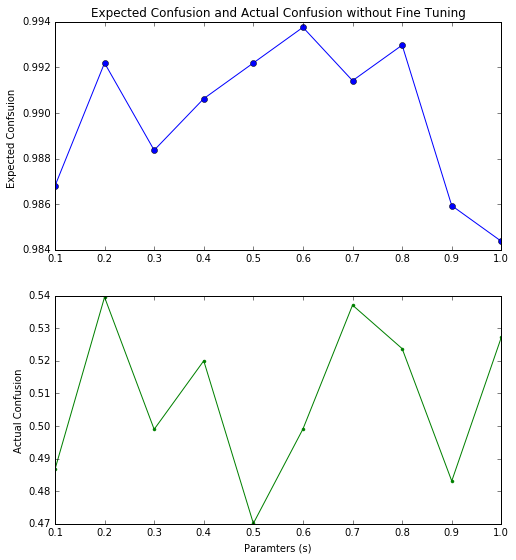

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# These scores were taken from the K folds 
cv_scores_random_forest_ec = np.array([0.98679728987364945, 0.9921875, 0.98836603682170543, 0.99062499999999998, 0.9921875, 0.99375000000000002, 0.99141230620155041, 0.99296874999999996, 0.98593750000000002, 0.984375])
cv_scores_svm_ac = np.array([0.48667459218397119, 0.53950026323017775, 0.49897054110968692, 0.51998660959531229, 0.47012337483977296, 0.49907287660990052, 0.53705227026490876, 0.52371632370444976, 0.48311902963437714, 0.52721385162973811])

x1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x2 = np.array([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

y1 = cv_scores_random_forest_ec
y2 = cv_scores_svm_ac




plt.figure(figsize=(8,9))
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'bo-')
plt.title('Expected Confusion and Actual Confusion without Fine Tuning')
plt.ylabel('Expected Confsuion ')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'g.-')
plt.xlabel('Paramters (s)')
plt.ylabel('Actual Confusion')
plt.show()

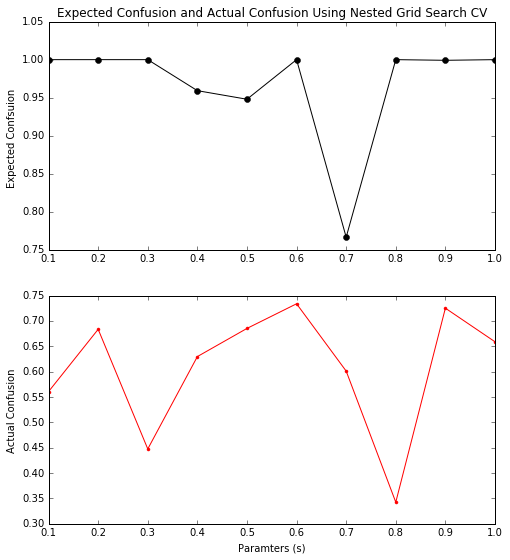

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# These scores were taken from the Nested Grid Search CV above
expected_confusion_scores = np.array([1., 1., 1., 0.95923677, 0.94796184, 1., 0.76669558, 1., 0.99913194, 1.])
actual_confusion_scores = np.array([0.56065858, 0.68343452, 0.44752819, 0.62966175, 0.68516912, 0.73373807, 0.60104076, 0.34258456, 0.72506505, 0.65885417])

x1 = np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
x2 = np.array([ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

y1 = expected_confusion_scores
y2 = actual_confusion_scores




plt.figure(figsize=(8,9))
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'ko-')
plt.title('Expected Confusion and Actual Confusion Using Nested Grid Search CV')
plt.ylabel('Expected Confsuion ')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('Paramters (s)')
plt.ylabel('Actual Confusion')
plt.show()